$X=\begin{pmatrix}
X_1^{(1)} \ \ X_2^{(1)} \ \ X_3^{(1)}\ \ \ldots \ \ X_n^{(1)}\\
X_1^{(2)} \ \ X_2^{(2)} \ \ X_3^{(2)}\ \ \ldots \ \ X_n^{(2)}\\
X_1^{(3)} \ \ X_2^{(3)} \ \ X_3^{(3)}\ \ \ldots \ \ X_n^{(3)}\\
\cdots \ \ \ \cdots \ \ \ \cdots \ \ \ \cdots \ \ \ \cdots \\
X_1^{(m)} \ \ X_2^{(m)} \ \ X_3^{(m)}\ \ \ldots \ \ X_n^{(m)}\\
\end{pmatrix}\ \ \ \   $
$W_k=\begin{pmatrix}
W_1^{(1)} \ \ W_2^{(1)} \ \ W_3^{(1)}\ \ \ldots \ \ W_n^{(1)}\\
W_1^{(2)} \ \ W_2^{(2)} \ \ W_3^{(2)}\ \ \ldots \ \ W_n^{(2)}\\
W_1^{(3)} \ \ W_2^{(3)} \ \ W_3^{(3)}\ \ \ldots \ \ W_n^{(3)}\\
\cdots \ \ \ \cdots \ \ \ \cdots \ \ \ \cdots \ \ \ \cdots \\
W_1^{(k)} \ \ W_2^{(k)} \ \ W_3^{(k)}\ \ \ldots \ \ W_n^{(k)}\\
\end{pmatrix}$

$X \cdot W_k^T = X_k$

$(m*n) \cdot (n*k)=m*k$

#### 反向操作 $X_k \cdot W_k=X_m$ 可以恢复成原始维度的矩阵,
#### 但是$X_m$和$X$是不一样的, 因为数据在降为的过程中是有信息丢失的

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.empty((100,2))
x[:, 0] = np.random.uniform(0., 100., size=100)
x[:, 1] = 0.75 * x[:,0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
from c16_PCA import PCA

pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components = 2)

In [4]:
pca.components_

array([[ 0.76961081,  0.63851327],
       [ 0.63851906, -0.76960601]])

#### 降维度操作

In [5]:
pca_1 = PCA(n_components=1)
pca_1.fit(x)

PCA(n_components = 1)

In [6]:
x_reduction = pca_1.transform(x)
x_reduction.shape

(100, 1)

In [8]:
# 恢复
x_restore = pca_1.inverse_transform(x_reduction)
x_restore.shape

(100, 2)

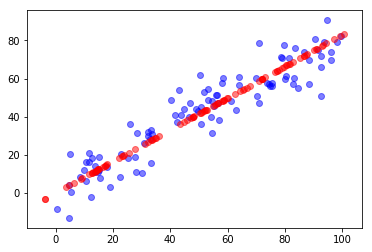

In [9]:
plt.scatter(x[:,0], x[:,1], color='b', alpha=0.5)
plt.scatter(x_restore[:,0], x_restore[:,1], color='r', alpha=0.5)
plt.show()

# scikit-learn中的PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=1)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.components_
# 结果和我们自己封装的类的结果不一样,
# 我们封装用的是梯度上升法求解
# sklearn中是用其他方法, 所以结果的方向不一致

array([[-0.76961077, -0.63851333]])

In [14]:
x_reduction = pca.transform(x)
x_reduction.shape

(100, 1)

In [15]:
x_restore = pca.inverse_transform(x_reduction)
x_restore.shape

(100, 2)

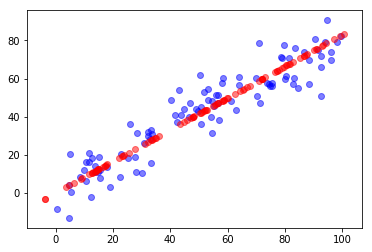

In [16]:
plt.scatter(x[:,0], x[:,1], color='b', alpha=0.5)
plt.scatter(x_restore[:,0], x_restore[:,1], color='r', alpha=0.5)
plt.show()